<h1 align="center"> Statistics and Financial Data Analysis </h1>

In [1]:
%reset -f
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

Auto-Correlation Function (ACF)
====

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf


In [4]:
df1 = pd.read_csv('GSRet.csv', index_col = 0)
df2 = pd.read_csv('LogVol.csv', index_col = 0)

# GS daily log return
GSrtn = df1['x']
# Log of GS volume traded
GSLogVol = df2['x']
# GS volume traded
GSVol = np.exp(GSLogVol)

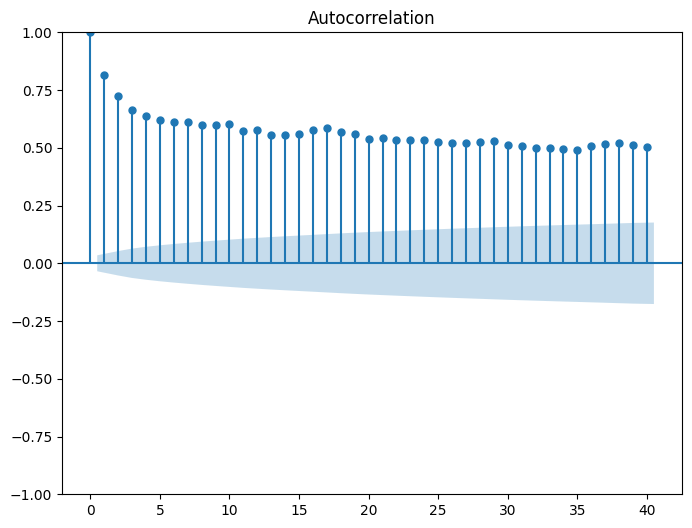

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(GSVol, lags = 40, zero = True)
plt.show()

In [6]:
acf(GSVol)

array([1.        , 0.81668627, 0.7235708 , 0.66336083, 0.63810454,
       0.62170401, 0.61048944, 0.61076415, 0.59750147, 0.59703963,
       0.60503019, 0.57254858, 0.57541565, 0.5572556 , 0.55686945,
       0.56137294, 0.57586315, 0.58439224, 0.56938775, 0.55856084,
       0.53973775, 0.54109188, 0.53382347, 0.53340599, 0.53525536,
       0.52404516, 0.52109472, 0.51892758, 0.52612858, 0.52888499,
       0.51043937, 0.5078406 , 0.4983081 , 0.49737606, 0.49459529,
       0.49170442])

In [7]:
pacf(GSVol)

array([ 1.        ,  0.8169403 ,  0.17025903,  0.10562051,  0.13476962,
        0.09986274,  0.08574691,  0.1055575 ,  0.04073474,  0.08397131,
        0.09822624, -0.0529292 ,  0.09333775, -0.00734881,  0.04867566,
        0.06453235,  0.08038379,  0.05478317, -0.00351058,  0.0086246 ,
       -0.01602977,  0.05722946, -0.0127751 ,  0.03872611,  0.02269954,
       -0.01511188,  0.01312673,  0.01939238,  0.04876654,  0.0282107 ,
       -0.0325236 ,  0.01455013, -0.00141408, -0.00246856,  0.00911539,
        0.01023368])

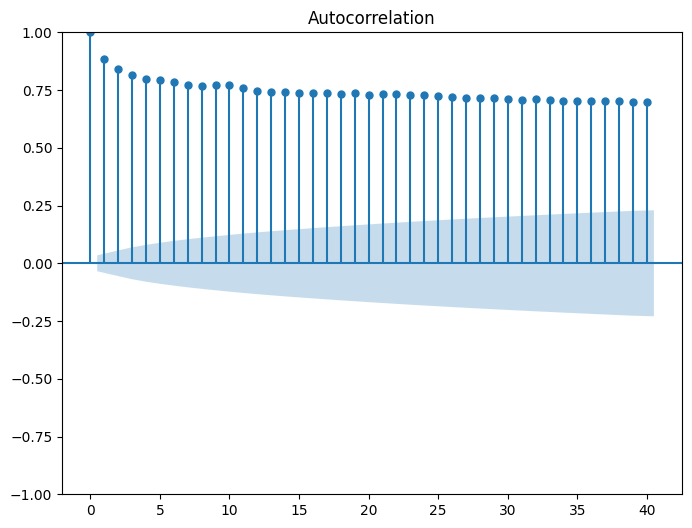

In [8]:
plot_acf(GSLogVol, lags = 40)
plt.show()

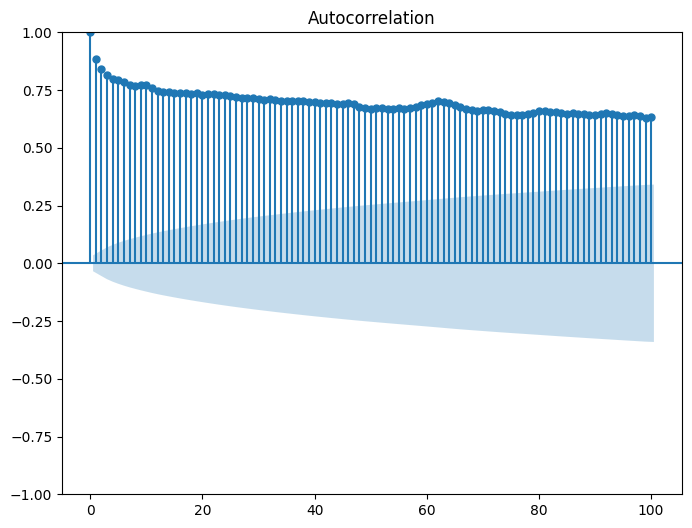

In [9]:
plot_acf(GSLogVol, lags = 100)
plt.show()

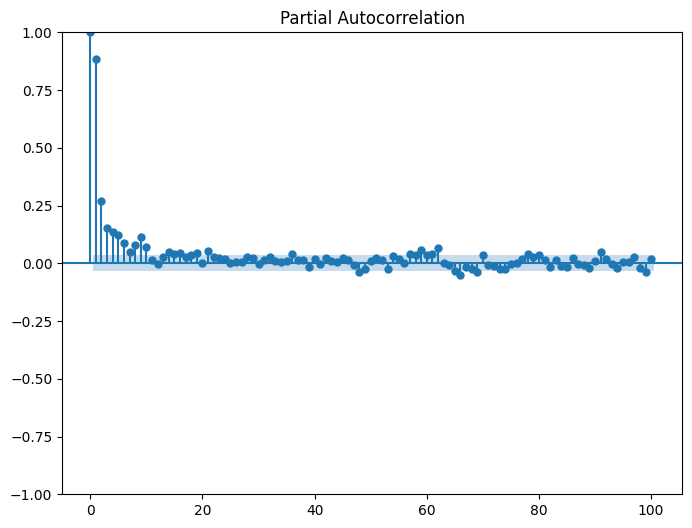

In [10]:
plot_pacf(GSLogVol, lags = 100)
plt.show()

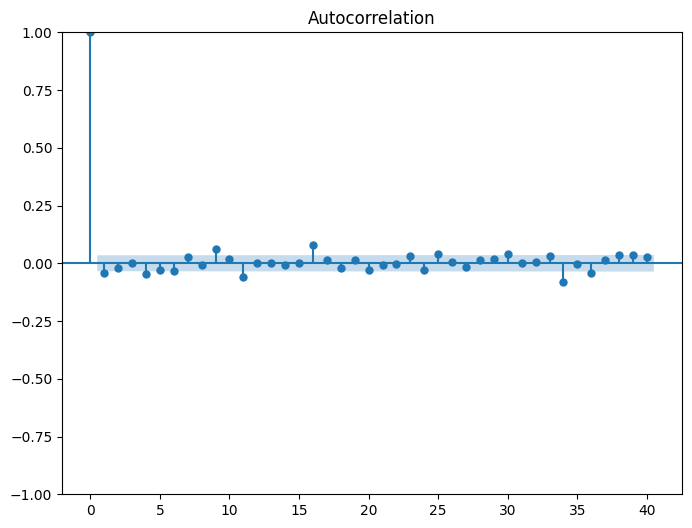

In [11]:
plot_acf(GSrtn, lags = 40)
plt.show()

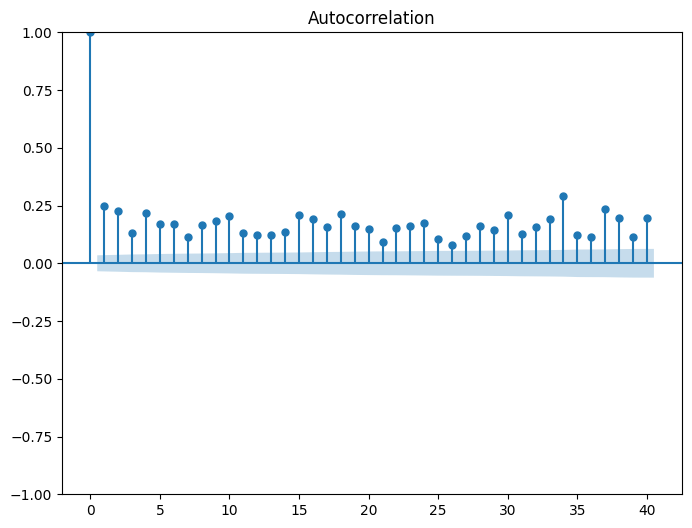

In [12]:
plot_acf(GSrtn**2, lags = 40)
plt.show()


In [13]:
sm.stats.acorr_ljungbox(GSrtn,lags=10)

,lb_stat,lb_pvalue
1,6.123950,0.013336
2,7.507124,0.023434
3,7.510096,0.057300
4,14.906755,0.004899
5,17.780161,0.003235
6,21.369849,0.001574
7,24.106714,0.001091
8,24.371228,0.001985
9,36.753867,0.000029
10,37.756999,0.000042


In [53]:
import yfinance as yfin
yfin.pdr_override()
#GS = pd_data.data.get_data_yahoo('GS',start_date,end_date)['Adj Close']
#display(GS)

start_date = '2018-01-01'
end_date = '2019-12-31'

df = pd_data.data.get_data_yahoo('AAPL',start_date,end_date)['Adj Close']
df_rtn = np.log(df).diff().dropna()

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Daily Log Returns')

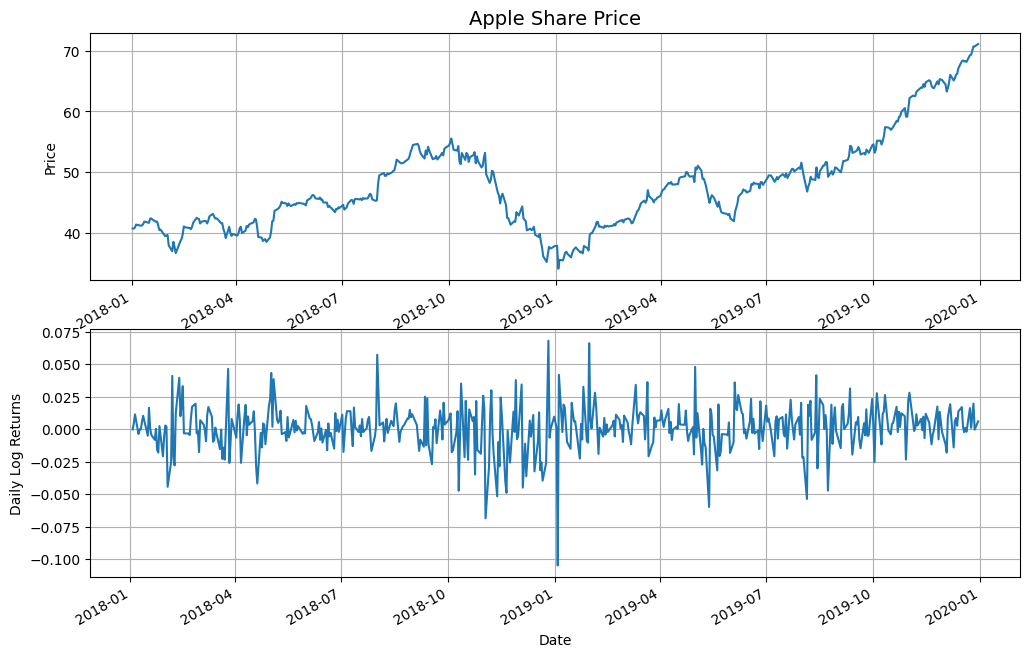

In [54]:
plt.figure(figsize=(12,8))
plt.subplot(2,1, 1)
df.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Apple Share Price", fontsize = 14)
plt.subplot(2,1, 2)
df_rtn.plot()
plt.grid()
plt.ylabel("Daily Log Returns")
#plt.savefig("Apple_stationary")

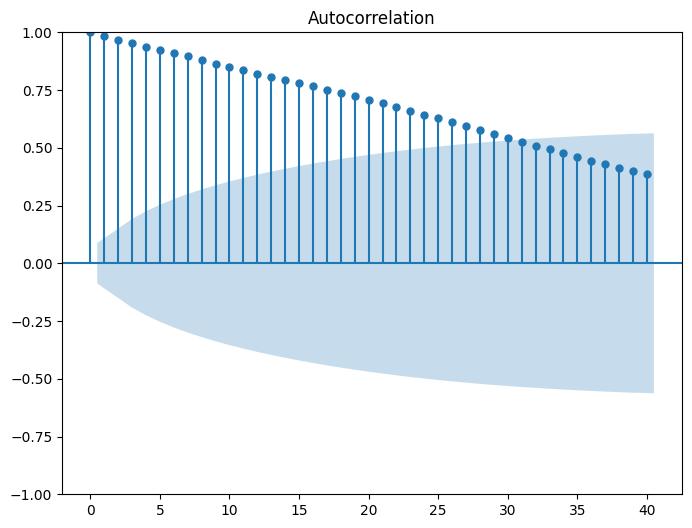

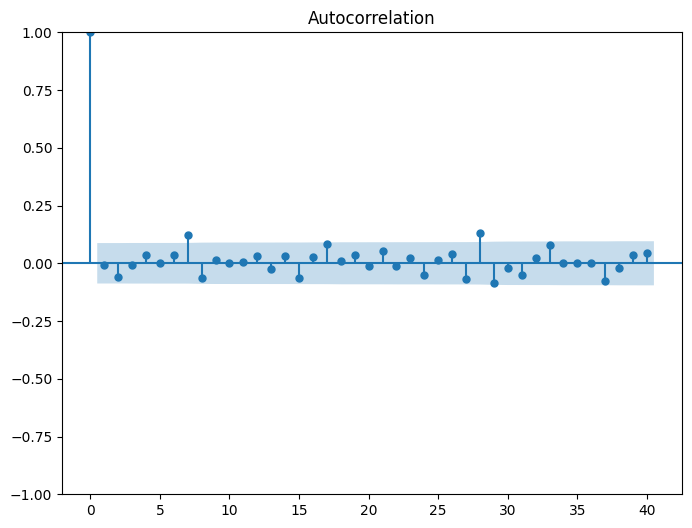

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf

plot_acf(df, lags = 40)
plt.show()
plot_acf(df_rtn, lags = 40)
plt.show()

In [56]:
acf(df)

array([1.        , 0.98362184, 0.96751879, 0.95213767, 0.9382534 ,
       0.92385728, 0.90999292, 0.89554474, 0.87978552, 0.86454799,
       0.84912892, 0.83481946, 0.8210593 , 0.80692651, 0.79328946,
       0.77954625, 0.76552132, 0.75184092, 0.73805352, 0.72420639,
       0.70898833, 0.69313877, 0.67651637, 0.66026787, 0.64279965,
       0.6271907 , 0.61091905, 0.59402746])

In [57]:
pacf(df)

array([ 1.00000000e+00,  9.85585162e-01,  3.75656099e-04,  1.62429011e-02,
        4.42699172e-02, -2.46965184e-02,  1.25765568e-02, -2.68551422e-02,
       -5.66100722e-02,  9.63295898e-03, -2.06836465e-02,  2.72549005e-02,
        1.39227027e-02, -2.31273185e-02,  1.66714699e-02, -1.13140616e-02,
       -2.04466309e-02,  6.40396854e-03, -2.00344872e-02, -1.09071136e-02,
       -5.78937793e-02, -3.79275487e-02, -3.83972387e-02, -5.85434078e-03,
       -5.92638291e-02,  5.50793798e-02, -3.66431126e-02, -3.15805317e-02])

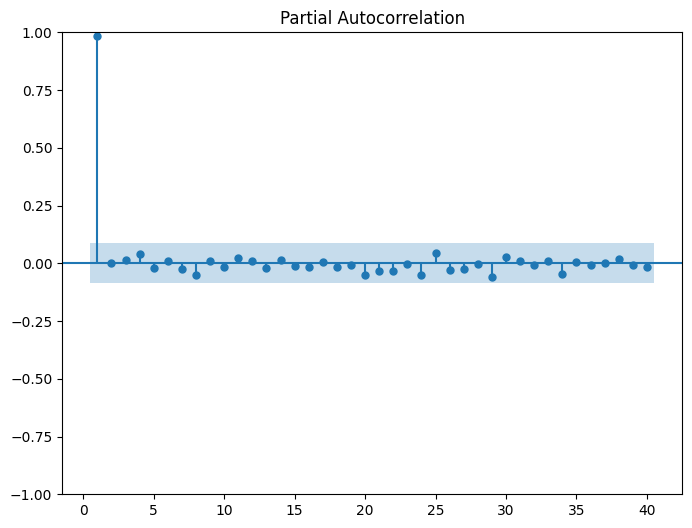

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import pacf

plot_pacf(df, lags = 40, zero = False)
plt.show()

In [18]:
lags = m.floor(np.log(len(df_rtn))) # Choosing a good lag number for test
ljbox_test_APPL = sm.stats.acorr_ljungbox(df_rtn,lags)
ljbox_test_APPL

,lb_stat,lb_pvalue
1,0.022457,0.880877
2,1.742052,0.418522
3,1.756399,0.624469
4,2.333943,0.674596
5,2.334366,0.801206
6,2.943201,0.815941


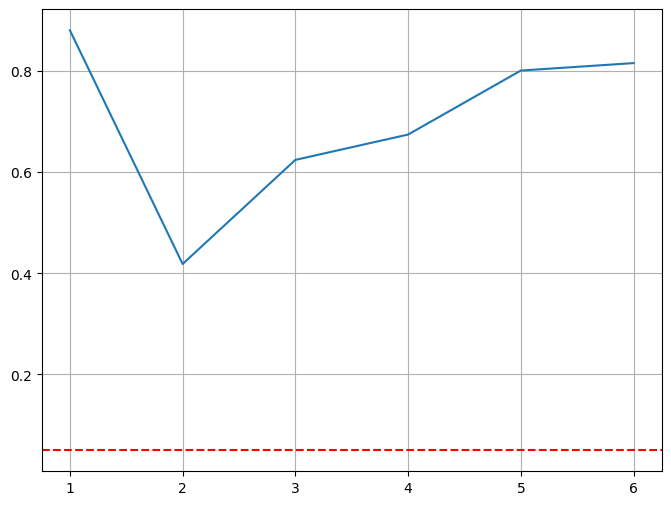

In [19]:
plt.plot(ljbox_test_APPL['lb_pvalue'])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()

In [20]:
df2 = pd.read_csv('AirPassenger.csv')

len(df2)
df2

,x
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [21]:
df2['Year'] = np.linspace(1948,1960,144)

In [23]:
df2 = df2.set_index(['Year'])

,x
Year,
1948.000000,112
1948.083916,118
1948.167832,132
1948.251748,129
1948.335664,121
...,...
1959.664336,606
1959.748252,508
1959.832168,461


Text(0.5, 1.0, 'Monthly Airline Passengers')

<Figure size 1200x800 with 0 Axes>

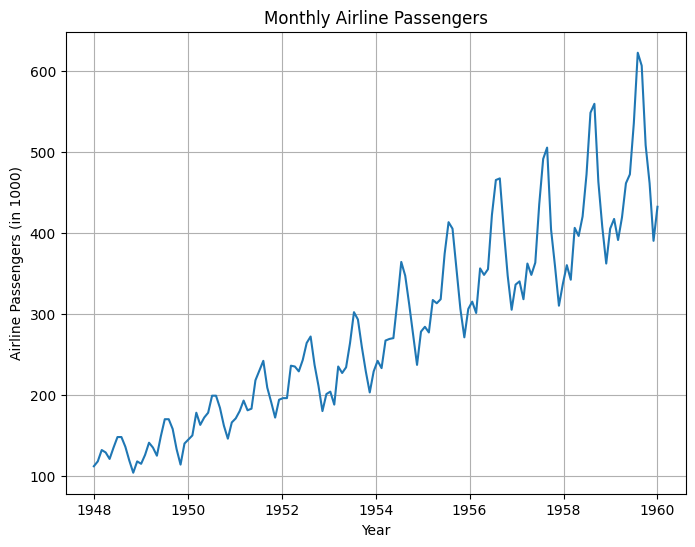

In [24]:
plt.figure(figsize=(12,8))
df2.plot(legend = None)
plt.grid()
plt.ylabel("Airline Passengers (in 1000)")
plt.title("Monthly Airline Passengers")
#plt.savefig("AirlinePass")

Text(0.5, 1.0, 'Just White Noise')

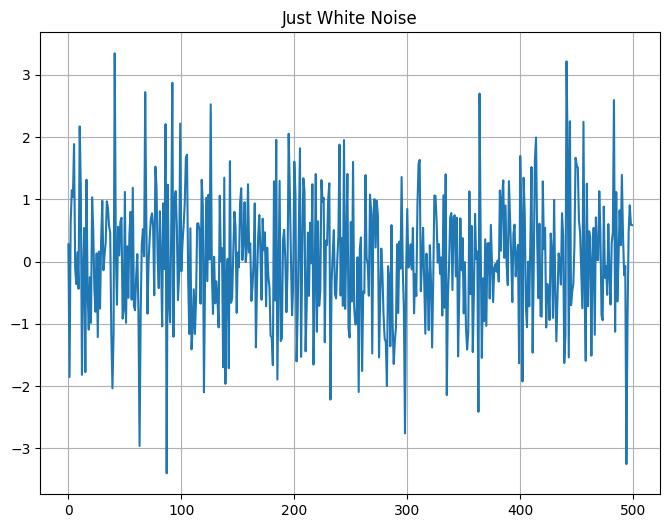

In [25]:
np.random.seed(17)
rv = stats.norm(0,1)

nx = 500
x = rv.rvs(nx)

plt.plot(x)
plt.grid()
plt.title("Just White Noise")
#plt.savefig("White Noise")

In [26]:
def plot_diagnosticsTight2(data, rtn, title1 = 'APPLE'):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=10)
    axes[0].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data,lags=25,zero=True, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=10)
    axes[1].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(rtn,lags=25,zero=True, ax = axes[1], title= 'ACF Log Returns '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)

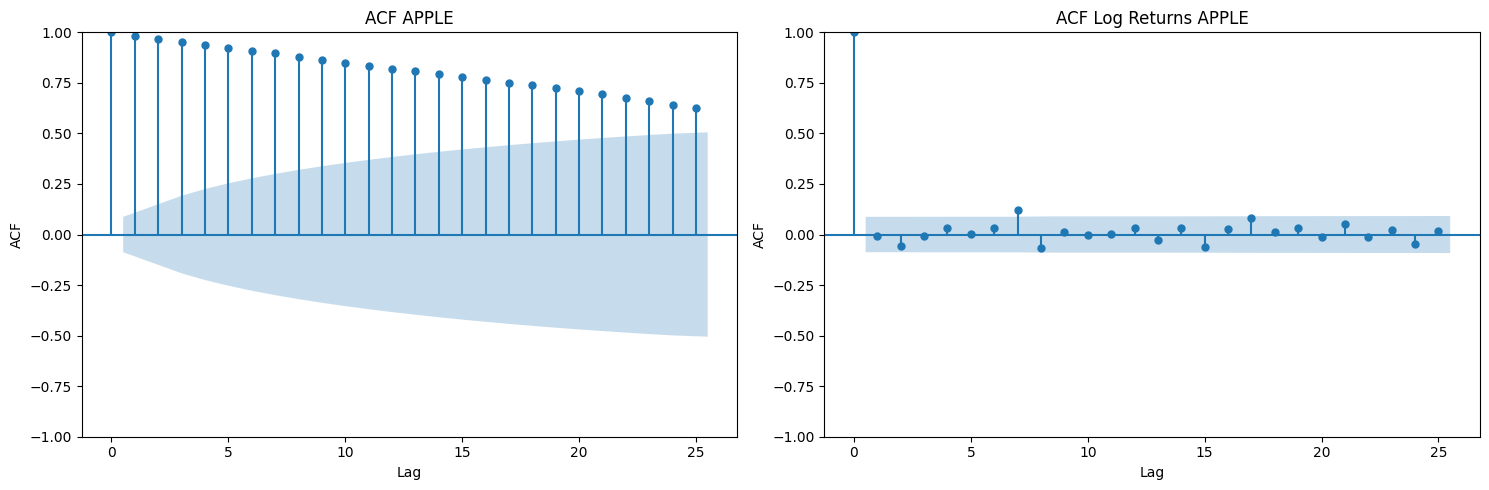

In [27]:
plot_diagnosticsTight2(df, df_rtn)

A simple example with gaussian white noise
===

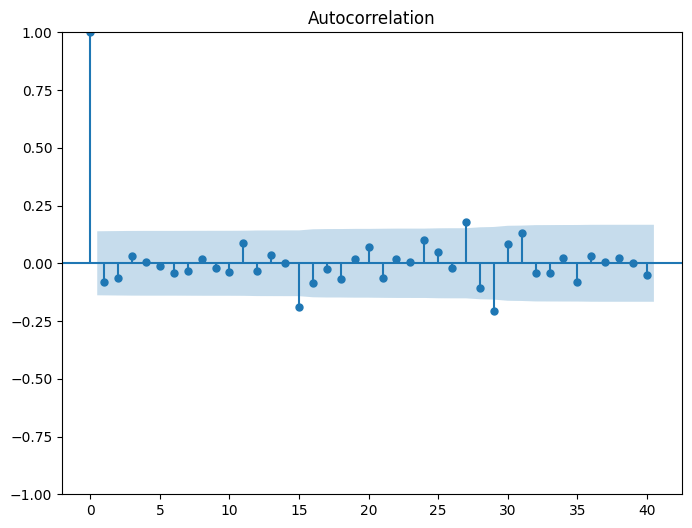

In [28]:
# Usin ACF tests for a sequence of iid noise.
np.random.seed(17)
x_time_series = stats.norm(0,1).rvs(size=200)
plot_acf(x_time_series, lags = 40, zero = True)
plt.show()


- The sample size is 200 (ordered as 200 observations in a time series)
- Expected ACF is zero for any lag h >0.
- We'd expect the $\hat{\rho}_h$ to be distributed approx as $N(0,1/n)$ for large $n$.
- Hence, given $H_0: \hat{\rho}_h=0$, we would expect that 95% of samples would fall within the confidence interval $(-1.96/ \sqrt{n},1.96 /\sqrt{n})$
- This would be for 40 lags, roughly 2, as we can see below, pretty close.

An example with FX Data
===

In [29]:
start_date = '2010-01-01'
end_date = '2019-12-31'

df = pd_data.data.get_data_yahoo("EURUSD=X",start_date,end_date)['Adj Close']
df_rtn = np.log(df).diff().dropna()

[*********************100%%**********************]  1 of 1 completed


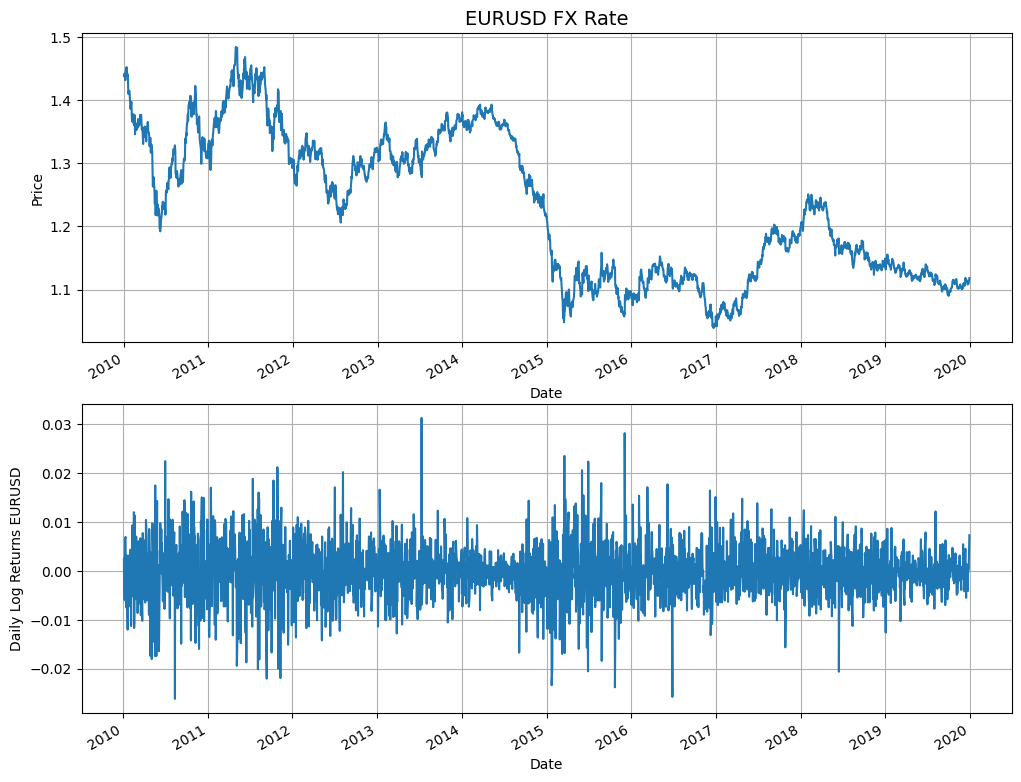

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(2,1, 1)
df.plot()
plt.grid()
plt.ylabel("Price")
plt.title("EURUSD FX Rate", fontsize = 14)
plt.subplot(2,1, 2)
df_rtn.plot()
plt.grid()
plt.ylabel("Daily Log Returns EURUSD")
plt.savefig("EURUSD_stationary")

In [31]:
EURUSDRtn = df_rtn

lags = m.floor(np.log(len(EURUSDRtn))) # Choosing a good lag number for test
ljbox_test_EURUSD = sm.stats.acorr_ljungbox(EURUSDRtn,lags)
ljbox_test_EURUSD

,lb_stat,lb_pvalue
1,5.367938,0.020510
2,5.457426,0.065303
3,7.879935,0.048559
4,7.973359,0.092559
5,9.763748,0.082213
6,10.257377,0.114223
7,10.565867,0.158709


In [32]:
ljbox_test_EURUSD['lb_pvalue'] # Look at p value of test for lag 6

1    0.020510
2    0.065303
3    0.048559
4    0.092559
5    0.082213
6    0.114223
7    0.158709
Name: lb_pvalue, dtype: float64

p-value is high, so we cannot reject the hypothesis this is white noise.
===

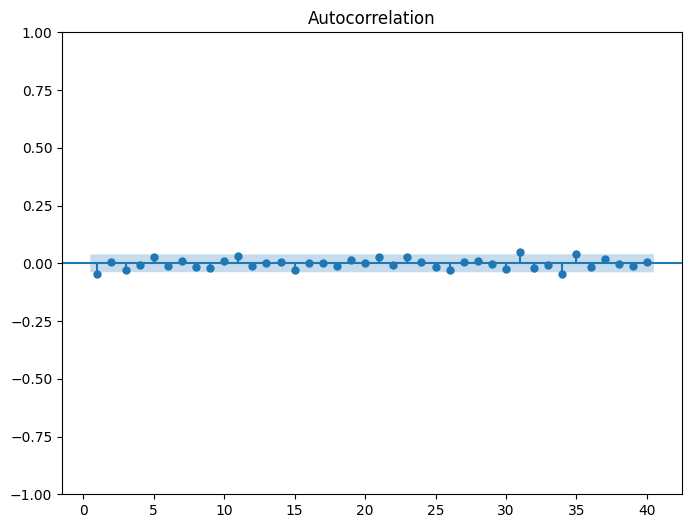

In [33]:
plot_acf(EURUSDRtn, lags = 40, zero = False)
plt.show()

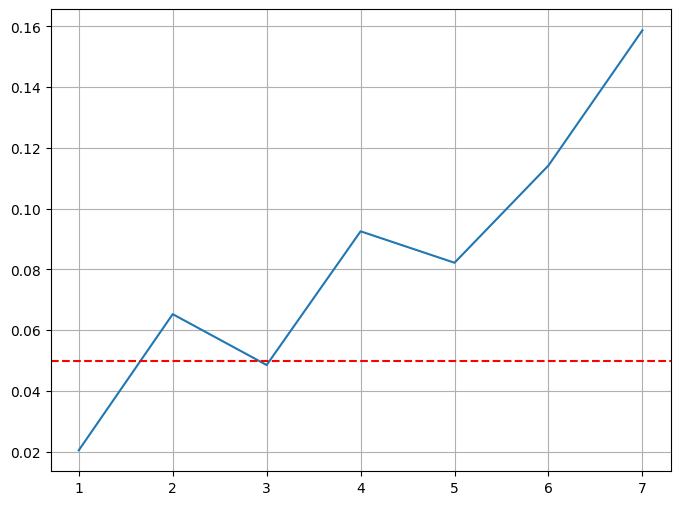

In [34]:
plt.plot(ljbox_test_EURUSD['lb_pvalue'])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()

In [35]:
# Selecting other assets

import pandas_datareader as pd_data
start_date = '2007-01-04'
end_date = '2019-10-25'
CiscoData = pd_data.data.get_data_yahoo('CSCO',start_date,end_date)
CiscoData.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-04,27.680000,28.49,27.540001,28.459999,19.609219,73012100
2007-01-05,28.440001,28.57,28.049999,28.469999,19.616106,62647800
2007-01-08,28.540001,28.74,28.320000,28.629999,19.726349,47936500
2007-01-09,28.719999,28.75,28.309999,28.469999,19.616106,50488300
2007-01-10,28.270000,28.73,28.209999,28.680000,19.760799,50632400


In [36]:
CiscoDataFixed_df = pd.read_csv('CiscoPrice5.csv', index_col = 0)
CiscoDataFixed_df.head()

,CSCO.Open,CSCO.High,CSCO.Low,CSCO.Close,CSCO.Volume,CSCO.Adjusted
1,27.459999,27.98,27.330000,27.730000,64226000,21.624001
2,27.680000,28.49,27.540001,28.459999,73012100,22.193258
3,28.440001,28.57,28.049999,28.469999,62647800,22.201054
4,28.540001,28.74,28.320000,28.629999,47936500,22.325829
5,28.719999,28.75,28.309999,28.469999,50488300,22.201054


In [37]:
CiscoDataFixed_df = pd.read_csv('CiscoRet.csv', index_col = 0)
CiscoDataFixed_df.head()

,CSCO.Close
1,0.025985
2,0.000351
3,0.005604
4,-0.005604
5,0.007349


In [38]:
# Log returns
CiscoRtn = np.log(CiscoData['Close']).diff().dropna() #diff = log(p(t))- log(p(t-1))= log(p(t)/p(t-1)),continuosly compounded return
CiscoRtn.head()
len(CiscoRtn)

3224

3224


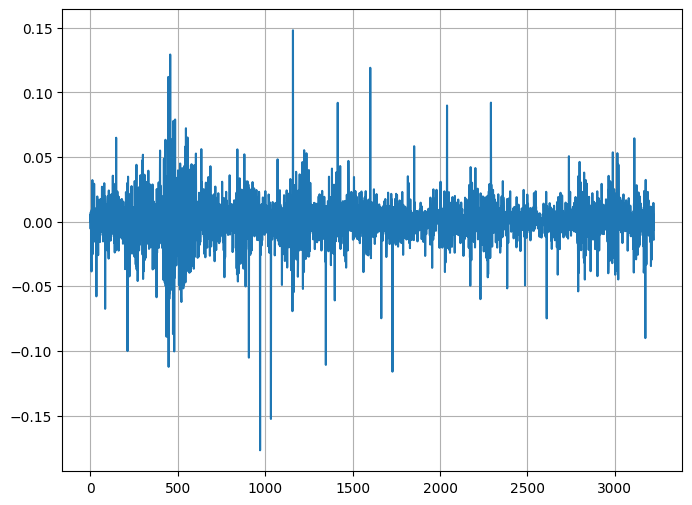

In [39]:
plt.plot(CiscoRtn.values)
print(len(CiscoRtn))
plt.grid()
plt.show()

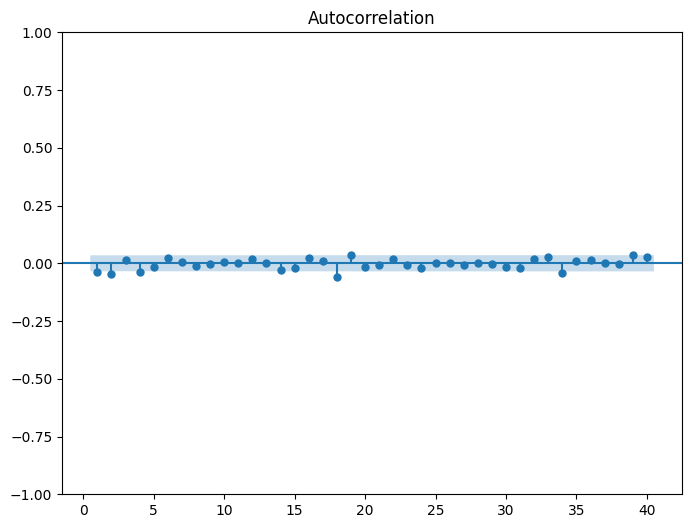

In [40]:
plot_acf(CiscoRtn, lags = 40,zero = False)
plt.show()

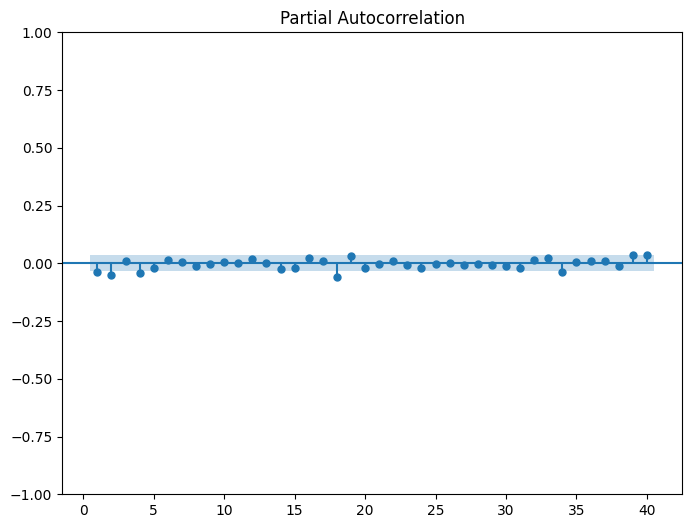

In [41]:
plot_pacf(CiscoRtn, lags = 40,zero = False)
plt.show()

In [42]:
lags = m.floor(np.log(len(CiscoRtn)))
ljbox_test_cisco = sm.stats.acorr_ljungbox(CiscoRtn,lags)
ljbox_test_cisco

,lb_stat,lb_pvalue
1,4.650880,0.031038
2,12.233771,0.002205
3,12.732582,0.005252
4,17.449234,0.001581
5,18.387464,0.002498
6,19.894215,0.002892
7,20.005764,0.005557
8,20.534629,0.008492


In [43]:
ljbox_test_cisco['lb_pvalue'][7] # Look at p value of test for lag 8 and reject hypothesis of white noise...

0.005557246410965092

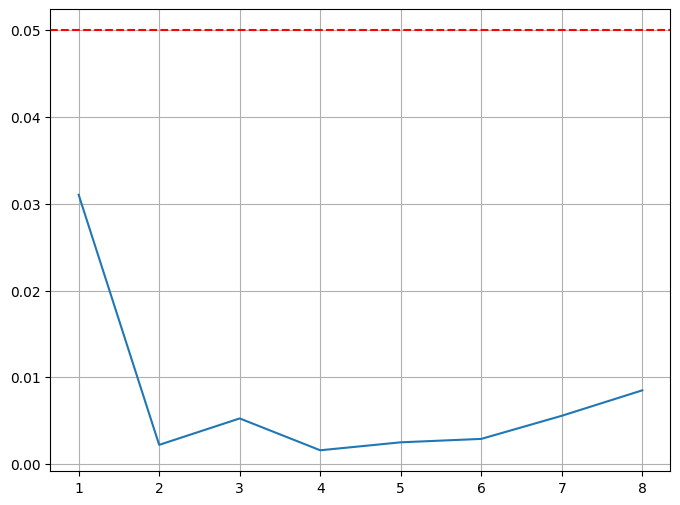

In [44]:
plt.plot(ljbox_test_cisco['lb_pvalue'])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()

Time Series Analysis Module in Python
===

- In R, the TSA library is used and in Python, an equivalent TSA module is part of statsmodels.
- Next, we will show some examples of AR(1) processes.
- Subsequently, methods for order selection for AR processes will be examnied.

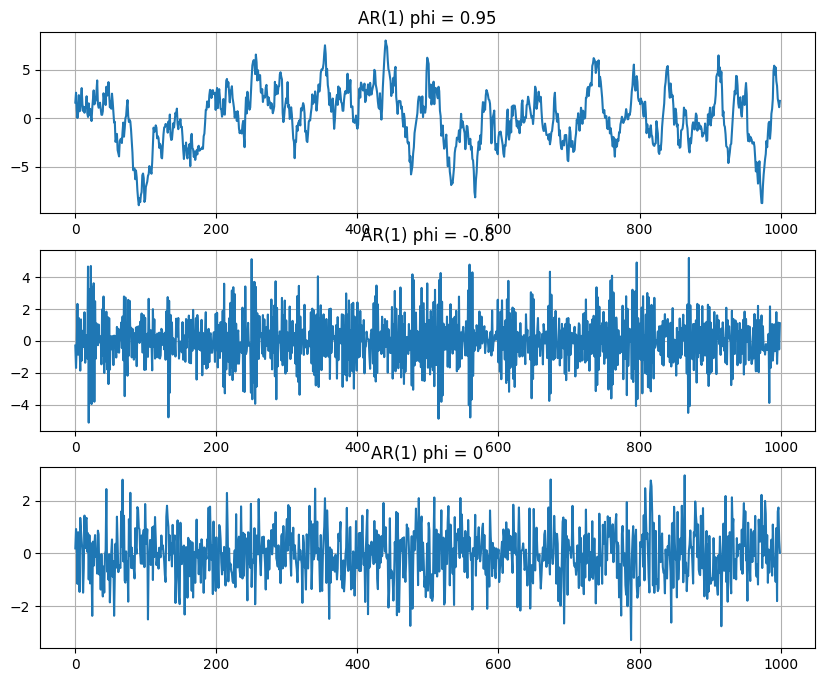

In [45]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.stattools as sm_tools
plt.figure(1, figsize=(10,8))

# AR for phi = 0.95
plt.subplot(3,1,1)
plt.title('AR(1) phi = 0.95')
phi = 0.95
phi1 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result1 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar1 = result1.generate_sample(nsample=1000)
plt.plot(data_ar1)
plt.grid()

# AR for phi = -0.8
plt.subplot(3,1,2)
plt.title('AR(1) phi = -0.8')
phi = -0.8
phi2 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2)
plt.grid()


# AR for phi = 0
plt.subplot(3,1,3)
plt.title('AR(1) phi = 0')
phi = 0
phi3 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result3 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar3 = result3.generate_sample(nsample=1000)
plt.plot(data_ar3)
plt.grid()
#plt.savefig('ACF_ARExample')

<Figure size 1500x1200 with 0 Axes>

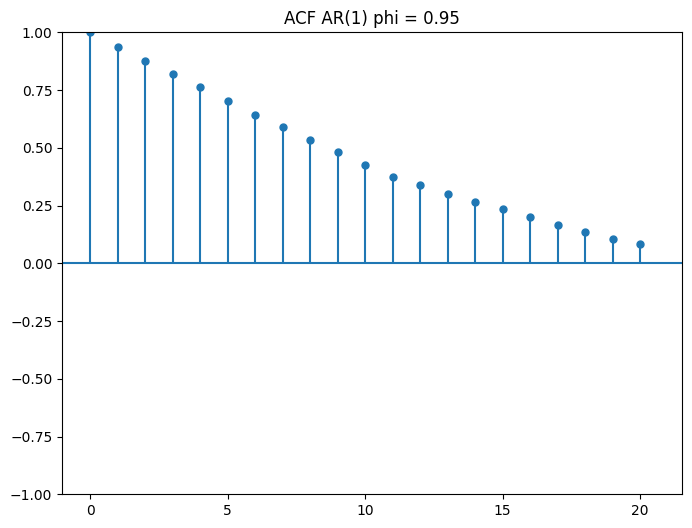

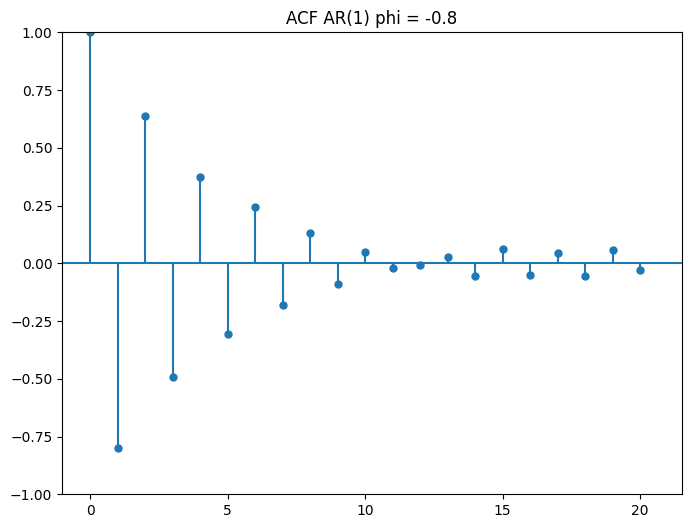

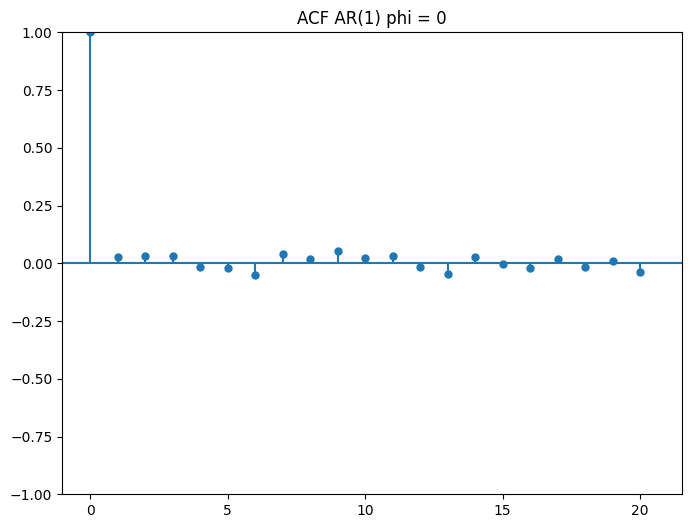

In [46]:
# Charateristic of ACFs for AR(1)

plt.figure(1, figsize=(15,12))

# AR for phi = 0.95 # this is more like random walk
plot_acf(data_ar1, alpha =1,  lags = 20,zero=True)
plt.title('ACF AR(1) phi = 0.95')
plt.show()

# AR for phi = -0.8
plot_acf(data_ar2, alpha =1, lags = 20,zero=True)
plt.title('ACF AR(1) phi = -0.8')
plt.show()

# AR for phi = 0 # this is more like white noise
plot_acf(data_ar3, alpha =1, lags = 20,zero=True)
plt.title('ACF AR(1) phi = 0')
plt.show()

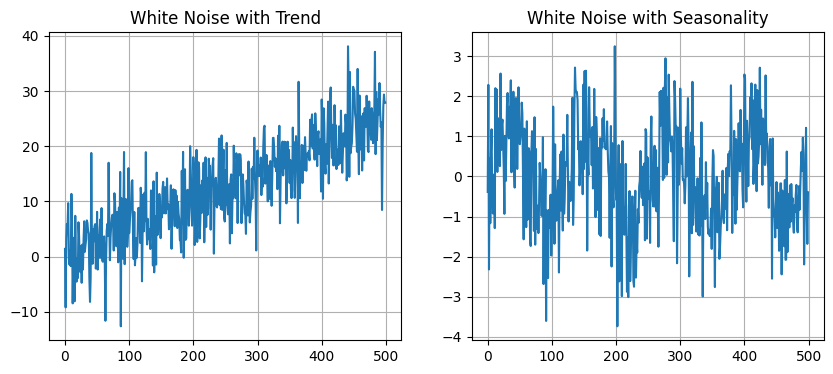

In [47]:
np.random.seed(17)
rv = stats.norm(0,5)

nx = 500
x = rv.rvs(nx)
y = np.zeros(nx)
z = np.zeros(nx)

for i in range(nx):
    y[i] = x[i]+i*0.05


rv = stats.norm(0,1)
x = rv.rvs(nx)

for i in range(nx):
    z[i] = np.sin(i*0.05)+x[i]

plt.figure(1, figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(y)
plt.grid()
plt.title("White Noise with Trend")
plt.subplot(1,2,2)
plt.plot(z)
plt.title("White Noise with Seasonality")
plt.grid()


#plt.savefig("Time Series with Trend")

In [48]:

def plot_diagnosticsTight3(data1,data2,data3):

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=10)
    axes[0].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data1,lags=40,zero=True, ax = axes[0], title= 'ACF phi =0.95', use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=10)
    axes[1].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data2,lags=40,zero=True, ax = axes[1], title= 'ACF phi = -0.8', use_vlines = True)
    axes[2].set_ylabel('ACF', fontsize=10)
    axes[2].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data3,lags=40,zero=True, ax = axes[2], title= 'ACF phi = 0', use_vlines = True)
    plt.tight_layout()
#    plt.savefig("ACF2.png", dpi = 300)


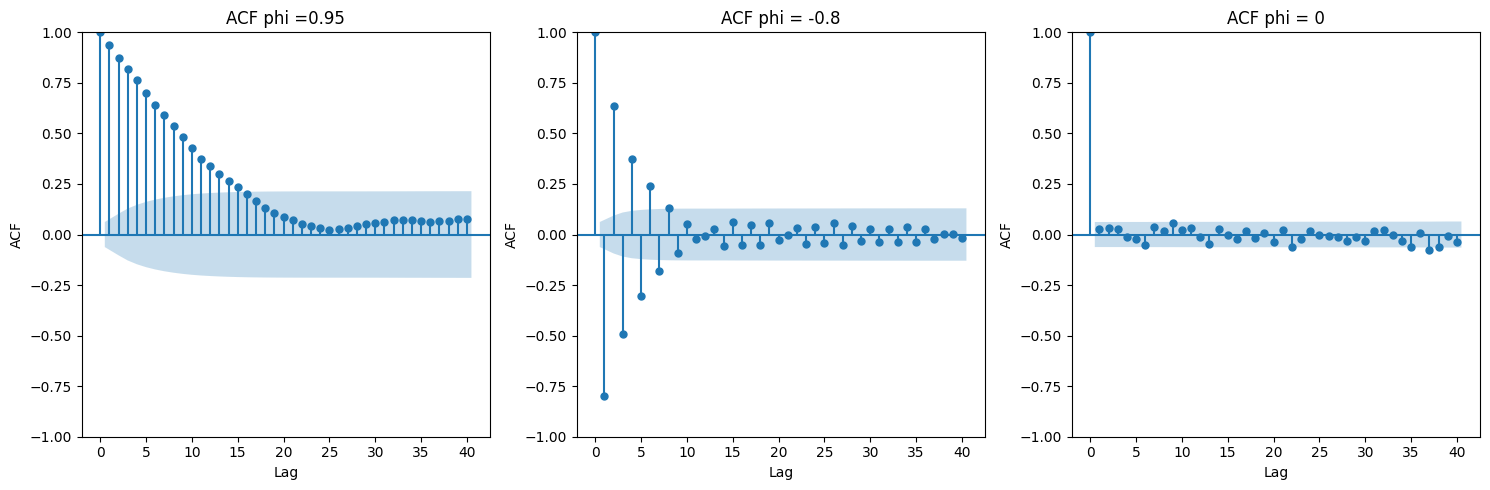

In [49]:
plot_diagnosticsTight3(data_ar1,data_ar2,data_ar3)

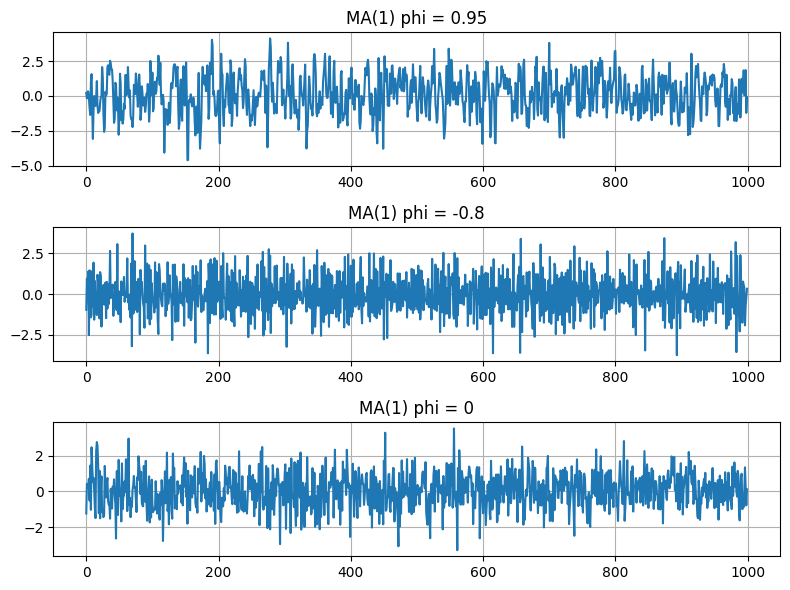

In [50]:
# MA for phi = 0.95
plt.subplot(3,1,1)
plt.title('MA(1) phi = 0.95')
phi = 0.95
phi1 = phi
ma1 = np.array([1, phi])#The input is inserted as negative in function
dummy = np.array([1])
result1 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma1 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1)
plt.grid()

# MA for phi = -0.8
plt.subplot(3,1,2)
plt.title('MA(1) phi = -0.8')
phi = -0.8
phi2 = phi
ma1 = np.array([1, phi])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma2 = result2.generate_sample(nsample=1000)
plt.plot(data_ma2)
plt.grid()


# MA for phi = 0
plt.subplot(3,1,3)
plt.title('MA(1) phi = 0')
phi = 0
phi3 = phi
ma1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result3 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma3 = result3.generate_sample(nsample=1000)
plt.plot(data_ma3)
plt.grid()
plt.tight_layout()
#plt.savefig('ACF_MAExample')

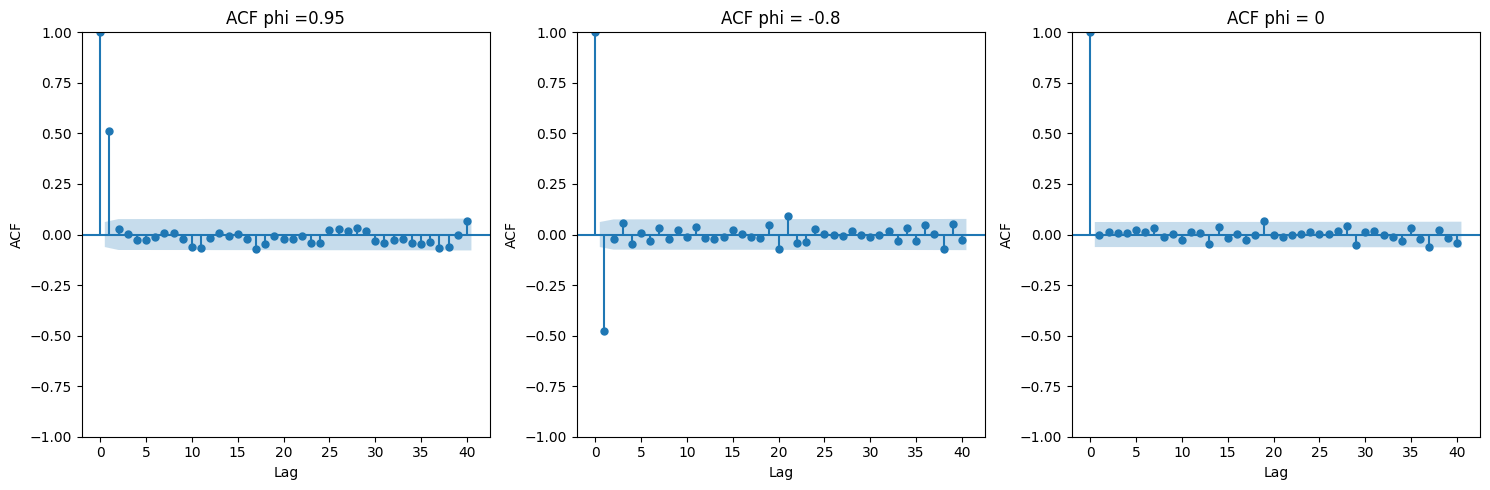

In [51]:
plot_diagnosticsTight3(data_ma1,data_ma2,data_ma3)